## The Bias Variance Trade Off
In this section, we will implement the bias variance trade off for a simple regression problem. Remember that the error in our model can be decomposed as the sum of the bias squared and the variance, with the noise term. We will begin by initializing our data and then using a regression

In [168]:
import matplotlib.pyplot as plt 
import numpy as np 

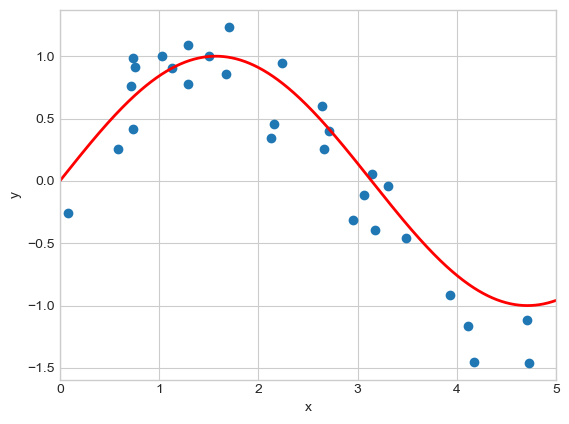

In [173]:
## Create data. This might not be linear 
x_lin = np.linspace(0,5,1000)
y_wave = np.sin(x_lin)

x = np.random.uniform(0,5,30)
epsilon = np.random.normal(0,.3,30) ## the noise term
y = np.sin(x) + epsilon 

## Now we plot it 
plt.scatter(x,y)
plt.plot(x_lin,y_wave,color='red',linewidth='2')
plt.xlim(0,5)
plt.ylabel('y')
plt.xlabel('x')
plt.grid(True)

We import a curve fitting package from scipy. Remember that the goal is to learn the data to generalize on unseen data. We will also need to split the data randomly into test data and training data.

In [176]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Text(0, 0.5, 'y')

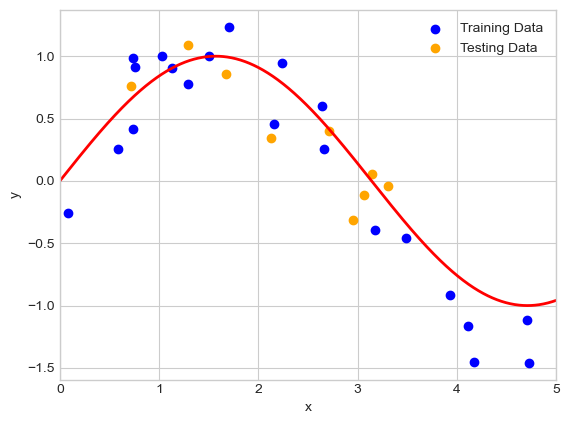

In [180]:
## Split the data into a testing batch and a training batch 
X = x.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Now let's plot the data 
plt.scatter(X_train,y_train,color='blue',label='Training Data')
plt.scatter(X_test,y_test,color='orange',label='Testing Data')
plt.plot(x_lin,y_wave,color='red',linewidth='2')
plt.grid(True)
plt.xlim(0,5)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

Now, there are 2 ways for us to increase the variance/bias of our model. Either we can increase the number of data points or we can increase the model complexity. Let us see what increasing the number of data points does

In [183]:
# Create polynomial features of degree 3

def model(N,k):
    """Function for calculating the bias and variance (outputed a list)
    given N data points and k degree for the polynomial"""
    
    ## Generate new data for each run 
    x = np.random.uniform(0,1.5*np.pi,N)
    epsilon = np.random.normal(0,.3,N) ## the noise term
    y = 4*np.sin(x) + epsilon 

    ## Split data
    X = x.reshape(-1,1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    ## instantiate our model 
    poly = PolynomialFeatures(degree=k)
    X_train_poly = poly.fit_transform(X_train)
    
    # Fit linear regression on the polynomial features. This is because nonpolynomial regression is still linear regression 
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Get the coefficients and intercept
    coeffs = model.coef_
    intercept = model.intercept_

    ## create prediction vector by defining a function within the function
    
   
    return coeffs, intercept

In [458]:
## Now simulate the data, say, 10 times and calculate the bias and variance for the model complexity 
def truefunc(x):
    """This is just the true function model. It is 4sin(x)"""
    return 4*np.sin(x)

def pred(x,coeffs,intercept):
    """This function will make predictions for a new x point based on the model that we trained"""
    ypred = np.zeros(len(x)) ## Initalizing the prediction vector
    x = x.flatten() ## Just to make dimensions right
    for n in range(1,len(coeffs)):
        ypred += coeffs[n]*(x**n) ## This is just doing linear combinations of polynomial basis based on our model
    ypred += intercept ## the intercept is added independently 
    return ypred 

def BVTradeOff(x,N,k):
    """This function will calculate the bias and variance for a model of complexity k, N sample size, and n different 
    samples at a specific point"""
    n = 30 ## around 30 points for stability; typical number for weak law of large numbers
    f = np.zeros(len(x)) ## initializing the prediction vector
    variances = [] ## This is just to keep track of the different models so we can compute the variance
    for i in range(n):
        coeffs, intercept = model(N,k) ## Get the coeffs from the model
        prediction = pred(x,coeffs,intercept) ## the actual prediction function
        f += prediction
        variances += [list(prediction)]
    variances = np.array(variances) 
    fbar = 1/n * f ## Weak law of large nubmers
    bias2 = (truefunc(x)-fbar)**2
    variance = np.var(variances,axis=0) ## Finding the variance of the entries
    return bias2, variance


In [548]:
import matplotlib.cm as cm
import matplotlib

def BVplot(x,N,k):
    """This is to create a plot of the different models"""
    n = 30
    f = np.zeros(len(x))
    variances = []
    for i in range(n):
        coeffs, intercept = model(N,k)
        prediction = pred(x,coeffs,intercept)
        cmap = matplotlib.colormaps.get_cmap('inferno')
        color_val = (i/70) + .3
        plot_color = cmap(color_val)
        plt.plot(x,prediction,color=plot_color)
        plt.xlim(0,1.5*np.pi)
        plt.ylim(-5,5)
    plt.plot(x,truefunc(x),color='blue',linewidth='4',label=r'4$\sin(x)$')
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.tight_layout()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Model Prediction For Polynomial Degree '+str(k))
    plt.legend()
    plt.grid(True)
    plt.savefig("ModelPredictionsk="+str(k)+'.png')

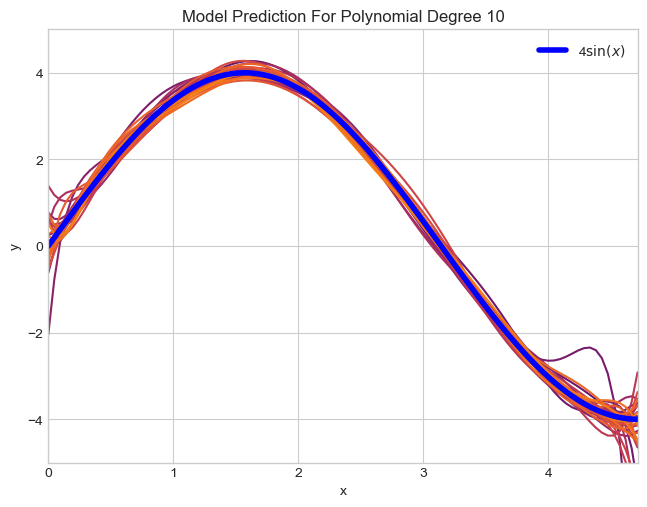

In [564]:
x = np.linspace(0,1.5*np.pi,100)
BVplot(x,100,10)

In [238]:
import ipywidgets as widgets
from ipywidgets import interact

N = 50  ## Because why not?

# Make the interactive slider
@interact(k=widgets.IntSlider(value=1, min=1, max=10, step=1, description='Degree k'))
def update_plot(k):
    plt.figure(figsize=(8,5))
    BVplot(x, N, k)
    plt.show()


interactive(children=(IntSlider(value=1, description='Degree k', max=10, min=1), Output()), _dom_classes=('wid…

To plot the bias variance trade off, we will have to pick a singular point

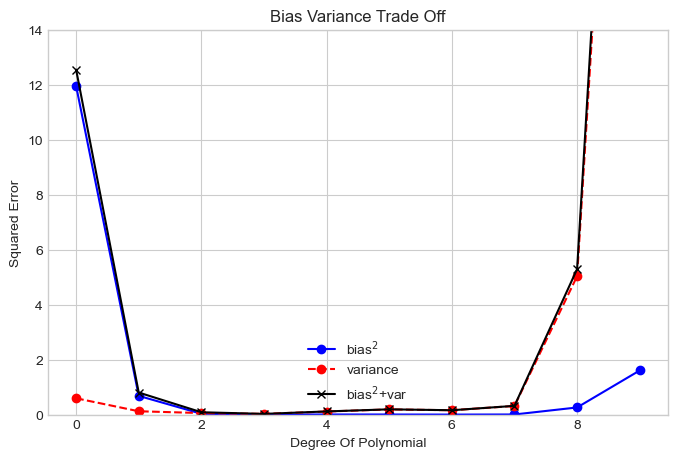

In [546]:
x0 = np.array([.2]) ## choose a random point on the interval 
biases2 = []
vars = []
for k in range(1,11):
    bias2, var = BVTradeOff(x0,N,k)
    biases2 += list(bias2)
    vars += list(var)
plt.figure(figsize=(8,5))
plt.plot(biases2,'b-o',label=r'bias$^2$')
plt.plot(vars,'r--o',label='variance')
plt.plot(np.array(biases2)+np.array(vars),'-x',color='black',label=r'bias$^2$+var')
plt.ylim(0,14)
plt.xlabel('Degree Of Polynomial')
plt.ylabel('Squared Error')
plt.title("Bias Variance Trade Off")
plt.legend()
plt.savefig("TradeOff.png")

## The Double Descent Surprise
The bias variance trade off tells us that as we increase the model complexity, the model will start to overfit and then the variance of the model output will increase. Overfitting means that the training loss will be very small but then the testing loss might be very very high. This is what the theory predicts. But what actually happens? To clearly see what is going on, we will reuse our general neural network built from chapter 1. Then we will train it on the mnist1d data set; which is a 1 dimensionalization of 2d handwritten images of numbers from 0 to 9. Classically, deep neural networks are very good at classifying these objects. What we are going to do is we are going to run the model over and over again for different input values and see how the testing loss changes as a function of the model complexity. We will just start with 2 layers and increase the number of nodes, with every activation being softmax

In [65]:
## We want to add more layers without having to manually add the ridiculous amount of layers

class GenNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_hidden_layers, activation_fn=nn.ReLU): ## Change activation if needed
        """
        Initializes a dynamic neural network.

        Args:
            input_size (int): The number of input features.
            hidden_size (int): The number of neurons in each hidden layer.
            output_size (int): The number of output neurons.
            num_hidden_layers (int): The number of hidden layers to create.
            activation_fn (nn.Module): The activation function class to use (e.g., nn.ReLU, nn.LeakyReLU).
        """
        super(GenNet, self).__init__()

        # Create a list to hold all the layers
        layers = []

        # Add the input layer
        # This layer maps from the input size to the first hidden size
        layers.append(nn.Linear(input_size, hidden_size))
        layers.append(activation_fn())

        # Add the hidden layers in a loop
        for _ in range(num_hidden_layers):
            layers.append(nn.Linear(hidden_size, hidden_size))
            layers.append(activation_fn()) ## arbitrary activation function but we will be using ReLU

        # Add the output layer
        # This layer maps from the last hidden size to the output size
        layers.append(nn.Linear(hidden_size, output_size))

        # Create the sequential model
        # The '*' unpacks the list of layers into arguments for nn.Sequential
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        """
        The forward pass is now handled entirely by the nn.Sequential container.
        """
        return self.network(x) ## The self.network was defined in the previous function. Sequential has already taken care of it for us

In [45]:
## This block is to load the mnist1d dataset
import mnist1d

args = mnist1d.get_dataset_args()
data = mnist1d.get_dataset(args, path='./mnist1d_data.pkl', download=True)

Saving to ./mnist1d_data.pkl
Successfully loaded data from ./mnist1d_data.pkl


Start by creating all the necessary functions to run the model. 

In [137]:
from torch.utils.data import TensorDataset, DataLoader

def _get_split_arrays(data, split="train"):
    """
    Tries a few common layouts used by mnist1d.
    Returns numpy arrays (x, y).
    """
    if isinstance(data, dict):
        # data['train'] = {'x': ..., 'y': ...}, data['test'] = {...}
        if split in data and isinstance(data[split], dict) and 'x' in data[split] and 'y' in data[split]:
            return data[split]['x'], data[split]['y']
        # flat train set + separate test arrays
        if split == "train" and 'x' in data and 'y' in data:
            return data['x'], data['y']
        if split == "test" and 'x_test' in data and 'y_test' in data:
            return data['x_test'], data['y_test']
        # tuple storage
        if split in data and isinstance(data[split], (tuple, list)) and len(data[split]) == 2:
            return data[split][0], data[split][1]
    raise KeyError(f"Couldn't locate split='{split}' in data. Available keys: {list(getattr(data, 'keys', lambda: [])())}")

def make_loader(x_np, y_np, batch_size=128, shuffle=True):
    """Converts the numpy data inputs to pytorch tensors. Returns a dataloader object, which is just 
    PyTorch's way of preparing the data"""
    x = torch.tensor(x_np, dtype=torch.float32)
    y = torch.tensor(y_np, dtype=torch.long)
    # Flatten to (N, D) just in case x has extra singleton dims
    if x.ndim > 2:
        x = x.view(x.shape[0], -1)
    elif x.ndim == 1:
        x = x.view(-1, 1)
    ds = TensorDataset(x, y)
    return DataLoader(ds, batch_size=batch_size, shuffle=shuffle, num_workers=0), ds

# Build data loaders 
xtr, ytr = _get_split_arrays(data, "train") ## Split the training data
xte, yte = _get_split_arrays(data, "test") ## Split the testing data and label it
train_loader, train_ds = make_loader(xtr, ytr, batch_size=256, shuffle=True) ## pass this through the make loader function
test_loader,  test_ds  = make_loader(xte, yte, batch_size=512, shuffle=False) ## ^^ 

input_size  = train_ds.tensors[0].shape[1] # This is just to make the dimension of the input 1D. Obviously it is because it's called mnist1d
num_classes = int(ytr.max() + 1) if hasattr(ytr, "max") else 10  # Just the number of classes. Should be 10.

# model parameters
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = GenNet(input_size=input_size,
               hidden_size=100,
               output_size=num_classes,
               num_hidden_layers=2,          # <- add a ton of layers by bumping this
               activation_fn=nn.ReLU) ## change the activation if needed

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)

#Training loop 
def train_epoch(model, loader):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for xb, yb in loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad(set_to_none=True)
        logits = model(xb)           
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * xb.size(0)
        preds = logits.argmax(dim=1)
        correct += (preds == yb).sum().item()
        total += yb.size(0)
    return running_loss / total, correct / total

@torch.no_grad()
def eval_epoch(model, loader):
    model.eval()
    running_loss, correct, total = 0.0, 0, 0
    for xb, yb in loader:
        xb, yb = xb.to(device), yb.to(device)
        logits = model(xb)
        loss = criterion(logits, yb)
        running_loss += loss.item() * xb.size(0)
        preds = logits.argmax(dim=1)
        correct += (preds == yb).sum().item()
        total += yb.size(0)
    return running_loss / total, correct / total

EPOCHS = 50
for epoch in range(1, EPOCHS + 1):
    tr_loss, tr_acc = train_epoch(model, train_loader)
    te_loss, te_acc = eval_epoch(model, test_loader)
    print(f"Epoch {epoch:02d} | train loss {tr_loss:.4f} acc {tr_acc:.4f} | test loss {te_loss:.4f} acc {te_acc:.4f}")

# Test on a NEW sub-batch from the test set 
@torch.no_grad()
def test_on_subbatch(model, dataset, sub_batch_size=64):
    model.eval()
    n = len(dataset)
    idx = torch.randperm(n)[:sub_batch_size]
    xb = dataset.tensors[0][idx].to(device)
    yb = dataset.tensors[1][idx].to(device)

    logits = model(xb)
    preds = logits.argmax(dim=1)
    acc = (preds == yb).float().mean().item()

    # Show a quick peek at predictions
    k = min(10, sub_batch_size)
    pairs = list(zip(yb[:k].tolist(), preds[:k].tolist()))
    print(f"\nSub-batch size: {sub_batch_size} | Accuracy: {acc*100:.2f}%")


test_on_subbatch(model, test_ds, sub_batch_size=64)

Epoch 01 | train loss 2.2662 acc 0.1718 | test loss 2.1724 acc 0.1900
Epoch 02 | train loss 2.0324 acc 0.1988 | test loss 1.8573 acc 0.2160
Epoch 03 | train loss 1.7971 acc 0.2520 | test loss 1.7367 acc 0.2600
Epoch 04 | train loss 1.7121 acc 0.3010 | test loss 1.7064 acc 0.2830
Epoch 05 | train loss 1.6560 acc 0.3317 | test loss 1.6611 acc 0.3070
Epoch 06 | train loss 1.5939 acc 0.3590 | test loss 1.5895 acc 0.3310
Epoch 07 | train loss 1.5167 acc 0.4015 | test loss 1.5074 acc 0.3780
Epoch 08 | train loss 1.4383 acc 0.4360 | test loss 1.4259 acc 0.4190
Epoch 09 | train loss 1.3736 acc 0.4612 | test loss 1.3707 acc 0.4320
Epoch 10 | train loss 1.3167 acc 0.4863 | test loss 1.3426 acc 0.4320
Epoch 11 | train loss 1.2739 acc 0.5122 | test loss 1.3218 acc 0.4600
Epoch 12 | train loss 1.2461 acc 0.5130 | test loss 1.2868 acc 0.4880
Epoch 13 | train loss 1.2200 acc 0.5262 | test loss 1.2949 acc 0.4600
Epoch 14 | train loss 1.1974 acc 0.5355 | test loss 1.2588 acc 0.4880
Epoch 15 | train los

In the next block, we will run the model for different values of system size. We will store the accuracies in a list to plot later

In [301]:
EPOCHS = 200
tr_loss, tr_acc, te_loss, te_acc = 0, 0, 0, 0 ## Initialize these to 0, but I guess it doesn't really matter 
test_accs = [] ## These are the lists of the accuracies as a function of the input size k
train_accs = [] ## ^^

xtr, ytr = _get_split_arrays(data, "train") ## Split the training data
xte, yte = _get_split_arrays(data, "test") ## Split the testing data and label it
train_loader, train_ds = make_loader(xtr, ytr, batch_size=256, shuffle=True) ## pass this through the make loader function
test_loader,  test_ds  = make_loader(xte, yte, batch_size=512, shuffle=False) ## ^^ 

for k in range(2,300):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = GenNet(input_size=input_size,
               hidden_size=k,
               output_size=num_classes,
               num_hidden_layers=2,         
               activation_fn=nn.ReLU) 
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=5e-3, weight_decay=1e-3)
    for epoch in range(1, EPOCHS + 1):
        tr_loss, tr_acc = train_epoch(model, train_loader)
        te_loss, te_acc = eval_epoch(model, test_loader)
    print('k =',k,'-> training acc:',tr_acc, ' | ', 'testing acc:',te_acc)
    test_accs += [te_acc]
    train_accs += [tr_acc]

test_accs = 1-np.array(test_accs)
train_accs = 1-np.array(train_accs)

k = 2 -> training acc: 0.32075  |  testing acc: 0.312
k = 3 -> training acc: 0.10025  |  testing acc: 0.089
k = 4 -> training acc: 0.436  |  testing acc: 0.451
k = 5 -> training acc: 0.45475  |  testing acc: 0.434
k = 6 -> training acc: 0.448  |  testing acc: 0.438
k = 7 -> training acc: 0.5085  |  testing acc: 0.477
k = 8 -> training acc: 0.50775  |  testing acc: 0.459
k = 9 -> training acc: 0.5225  |  testing acc: 0.471
k = 10 -> training acc: 0.536  |  testing acc: 0.487
k = 11 -> training acc: 0.53975  |  testing acc: 0.501
k = 12 -> training acc: 0.56175  |  testing acc: 0.486
k = 13 -> training acc: 0.59025  |  testing acc: 0.519
k = 14 -> training acc: 0.59675  |  testing acc: 0.489
k = 15 -> training acc: 0.66875  |  testing acc: 0.58
k = 16 -> training acc: 0.66075  |  testing acc: 0.532
k = 17 -> training acc: 0.66425  |  testing acc: 0.508
k = 18 -> training acc: 0.6395  |  testing acc: 0.525
k = 19 -> training acc: 0.70225  |  testing acc: 0.583
k = 20 -> training acc: 0.70

Now we will plot the result. Basic counting tells us that given an input size 40, output size 10, the value of k
when the number of parameters equals the number training size is approximately k=103. We will plot k = 103 as a dashed line

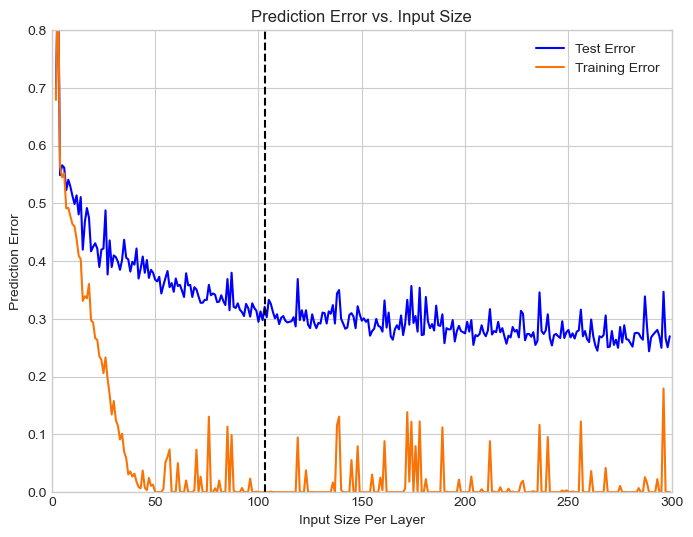

In [306]:
plt.figure(figsize=(8,6))
plt.style.use('seaborn-v0_8-whitegrid')
plt.plot([k for k in range(2,300)],test_accs,'b',label='Test Error')
plt.plot([k for k in range(2,300)],train_accs,color='#F97306',label='Training Error')
plt.axvline(x=103,linestyle='--',color='black')
plt.xlim(0,300)
plt.ylim(0,.8)
plt.xlabel('Input Size Per Layer')
plt.ylabel('Prediction Error')
plt.title('Prediction Error vs. Input Size')
plt.legend()
plt.savefig("DoubleDescentMNIST1D.png")

We don't see a sudden increase in testing accuracy predicted by the theory! Let's add some label noise. Label noise is just 
when the features are correct, but the output data is wrong. Basically, we are feeding the network wrong data to see how it generalizes

In [308]:
## First, we will need to create a function to add noise
def add_noise(y, num_classes, noise_rate):
    """
    Flip each label independently with probability `noise_rate`
    to a *different* class chosen uniformly at random.
    Returns a *new* numpy array with noisy labels.
    """
    rng = np.random.default_rng() ## This is just a random number generator 
    y = np.asarray(y).copy()
    n = y.shape[0]
    flip = rng.random(n) < noise_rate ## returns true or false as to whether or not to flip it

    # Sample random labels in [0, num_classes) then ensure =/= original
    new_labels = rng.integers(0, num_classes, size=n)
    
    # If equals original, move to the next class modulo K (vectorized trick)
    clash = new_labels == y
    new_labels[clash] = (new_labels[clash] + 1) % num_classes

    y[flip] = new_labels[flip] ## Makes it so that the new labels match with the old or not
    return y


In [312]:
## Redo the train/testing loop but with noise this time 
EPOCHS = 200
tr_loss, tr_acc, te_loss, te_acc = 0, 0, 0, 0 ## Initialize these to 0, but I guess it doesn't really matter 
test_accs_noise = [] ## These are the lists of the accuracies as a function of the input size k
train_accs_noise = [] ## ^^
noise_rate = 0.20 ## the noise rate. Let's keep it here but you can modify it to your liking

xtr, ytr = _get_split_arrays(data, "train") 
xte, yte = _get_split_arrays(data, "test") 
ytr_noisy = add_noise(ytr, num_classes=num_classes, noise_rate=noise_rate) ## adds noise to the y_labels
train_loader, train_ds = make_loader(xtr, ytr_noisy, batch_size=256, shuffle=True) ## rebuild the train_loader but now with noise
test_loader,  test_ds  = make_loader(xte, yte, batch_size=512, shuffle=False) ## ^^

for k in range(2,300):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = GenNet(input_size=input_size,
               hidden_size=k,
               output_size=num_classes,
               num_hidden_layers=2,         
               activation_fn=nn.ReLU) 
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=5e-3, weight_decay=1e-4)
    for epoch in range(1, EPOCHS + 1):
        tr_loss, tr_acc = train_epoch(model, train_loader)
        te_loss, te_acc = eval_epoch(model, test_loader)
    print('k =',k,'-> training acc:',tr_acc, ' | ', 'testing acc:',te_acc)
    test_accs_noise += [te_acc]
    train_accs_noise += [tr_acc]

test_accs_noise = 1-np.array(test_accs_noise)
train_accs_noise = 1-np.array(train_accs_noise)

k = 2 -> training acc: 0.2725  |  testing acc: 0.292
k = 3 -> training acc: 0.32  |  testing acc: 0.376
k = 4 -> training acc: 0.28825  |  testing acc: 0.298
k = 5 -> training acc: 0.34475  |  testing acc: 0.357
k = 6 -> training acc: 0.39775  |  testing acc: 0.453
k = 7 -> training acc: 0.40925  |  testing acc: 0.435
k = 8 -> training acc: 0.433  |  testing acc: 0.462
k = 9 -> training acc: 0.439  |  testing acc: 0.437
k = 10 -> training acc: 0.46775  |  testing acc: 0.49
k = 11 -> training acc: 0.45525  |  testing acc: 0.454
k = 12 -> training acc: 0.478  |  testing acc: 0.455
k = 13 -> training acc: 0.4785  |  testing acc: 0.45
k = 14 -> training acc: 0.52625  |  testing acc: 0.519
k = 15 -> training acc: 0.51425  |  testing acc: 0.488
k = 16 -> training acc: 0.51725  |  testing acc: 0.479
k = 17 -> training acc: 0.52725  |  testing acc: 0.423
k = 18 -> training acc: 0.54  |  testing acc: 0.457
k = 19 -> training acc: 0.54325  |  testing acc: 0.462
k = 20 -> training acc: 0.54875  |

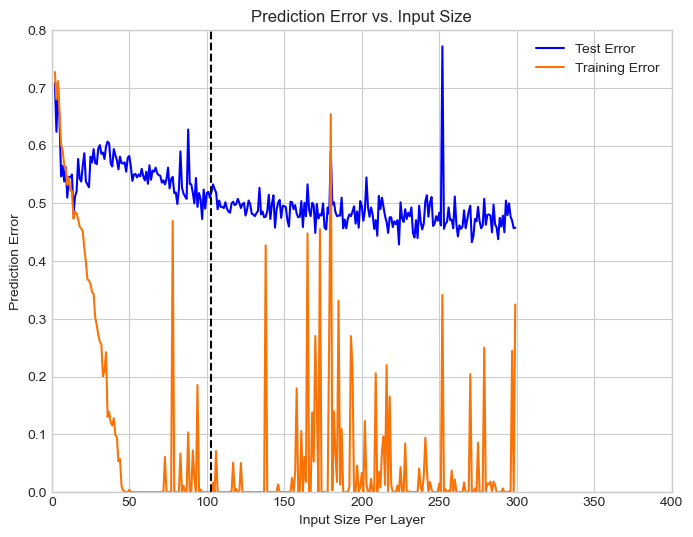

In [318]:
plt.figure(figsize=(8,6))
plt.style.use('seaborn-v0_8-whitegrid')
plt.plot([k for k in range(2,300)],test_accs_noise,'b',label='Test Error')
plt.plot([k for k in range(2,300)],train_accs_noise,color='#F97306',label='Training Error')
plt.axvline(x=103,linestyle='--',color='black')
plt.xlim(0,400)
plt.ylim(0,.8)
plt.xlabel('Input Size Per Layer')
plt.ylabel('Prediction Error')
plt.title('Prediction Error vs. Input Size')
plt.legend()
plt.savefig("DoubleDoubleDescentMNIST1D.png")

## Error Reduction
The first thing that we are going to do is look at how stochastic gradient descent compares to full batch gradient descent when generalizing on the MNIST1D dataset. 

In [343]:
## We essentially repeat the previous blocks but change the optimizer. This block is to run SGD

EPOCHS = 100
tr_loss, tr_acc, te_loss, te_acc = 0, 0, 0, 0 ## Initialize these to 0, but I guess it doesn't really matter 
test_accs_SGD = [] ## These are the lists of the accuracies as a function of the input size k
train_accs_SGD = [] ## ^^

xtr, ytr = _get_split_arrays(data, "train") ## Split the training data
xte, yte = _get_split_arrays(data, "test") ## Split the testing data and label it
train_loader, train_ds = make_loader(xtr, ytr, batch_size=256, shuffle=True) ## pass this through the make loader function
test_loader,  test_ds  = make_loader(xte, yte, batch_size=512, shuffle=False) ## ^^ 

for k in range(2,300):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = GenNet(input_size=input_size,
               hidden_size=k,
               output_size=num_classes,
               num_hidden_layers=2,         
               activation_fn=nn.ReLU) 
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
    for epoch in range(1, EPOCHS + 1):
        tr_loss, tr_acc = train_epoch(model, train_loader)
        te_loss, te_acc = eval_epoch(model, test_loader)
    print('k =',k,'-> training acc:',tr_acc, ' | ', 'testing acc:',te_acc)
    test_accs_SGD += [te_acc]
    train_accs_SGD += [tr_acc]

test_accs_SGD = 1-np.array(test_accs_SGD)
train_accs_SGD = 1-np.array(train_accs_SGD)

k = 2 -> training acc: 0.3305  |  testing acc: 0.306
k = 3 -> training acc: 0.33025  |  testing acc: 0.314
k = 4 -> training acc: 0.32625  |  testing acc: 0.299
k = 5 -> training acc: 0.30875  |  testing acc: 0.309
k = 6 -> training acc: 0.431  |  testing acc: 0.411
k = 7 -> training acc: 0.41  |  testing acc: 0.385
k = 8 -> training acc: 0.50275  |  testing acc: 0.489
k = 9 -> training acc: 0.47125  |  testing acc: 0.451
k = 10 -> training acc: 0.48325  |  testing acc: 0.46
k = 11 -> training acc: 0.45875  |  testing acc: 0.449
k = 12 -> training acc: 0.5035  |  testing acc: 0.461
k = 13 -> training acc: 0.49575  |  testing acc: 0.486
k = 14 -> training acc: 0.51025  |  testing acc: 0.478
k = 15 -> training acc: 0.5045  |  testing acc: 0.469
k = 16 -> training acc: 0.507  |  testing acc: 0.404
k = 17 -> training acc: 0.526  |  testing acc: 0.466
k = 18 -> training acc: 0.54875  |  testing acc: 0.451
k = 19 -> training acc: 0.51825  |  testing acc: 0.493
k = 20 -> training acc: 0.5335 

In [335]:
## We essentially repeat the previous blocks but change the optimizer. This block is to run SGD

EPOCHS = 100
tr_loss, tr_acc, te_loss, te_acc = 0, 0, 0, 0 ## Initialize these to 0, but I guess it doesn't really matter 
test_accs_GD = [] ## These are the lists of the accuracies as a function of the input size k
train_accs_GD = [] ## ^^

xtr, ytr = _get_split_arrays(data, "train") ## Split the training data
xte, yte = _get_split_arrays(data, "test") ## Split the testing data and label it
train_loader, train_ds = make_loader(xtr, ytr, batch_size=xtr.size, shuffle=True) ## pass this through the make loader function
test_loader,  test_ds  = make_loader(xte, yte, batch_size=xte.size, shuffle=False) ## ^^ 

for k in range(2,300):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = GenNet(input_size=input_size,
               hidden_size=k,
               output_size=num_classes,
               num_hidden_layers=2,         
               activation_fn=nn.ReLU) 
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
    for epoch in range(1, EPOCHS + 1):
        tr_loss, tr_acc = train_epoch(model, train_loader)
        te_loss, te_acc = eval_epoch(model, test_loader)
    print('k =',k,'-> training acc:',tr_acc, ' | ', 'testing acc:',te_acc)
    test_accs_GD += [te_acc]
    train_accs_GD += [tr_acc]

test_accs_GD = 1-np.array(test_accs_GD)
train_accs_GD = 1-np.array(train_accs_GD)

k = 2 -> training acc: 0.10275  |  testing acc: 0.089
k = 3 -> training acc: 0.15225  |  testing acc: 0.128
k = 4 -> training acc: 0.2665  |  testing acc: 0.256
k = 5 -> training acc: 0.32575  |  testing acc: 0.316
k = 6 -> training acc: 0.36775  |  testing acc: 0.357
k = 7 -> training acc: 0.32725  |  testing acc: 0.304
k = 8 -> training acc: 0.29925  |  testing acc: 0.282
k = 9 -> training acc: 0.2805  |  testing acc: 0.278
k = 10 -> training acc: 0.33575  |  testing acc: 0.317
k = 11 -> training acc: 0.31875  |  testing acc: 0.306
k = 12 -> training acc: 0.4675  |  testing acc: 0.438
k = 13 -> training acc: 0.3835  |  testing acc: 0.364
k = 14 -> training acc: 0.358  |  testing acc: 0.348
k = 15 -> training acc: 0.398  |  testing acc: 0.383
k = 16 -> training acc: 0.377  |  testing acc: 0.357
k = 17 -> training acc: 0.47675  |  testing acc: 0.472
k = 18 -> training acc: 0.3875  |  testing acc: 0.368
k = 19 -> training acc: 0.475  |  testing acc: 0.45
k = 20 -> training acc: 0.485  |

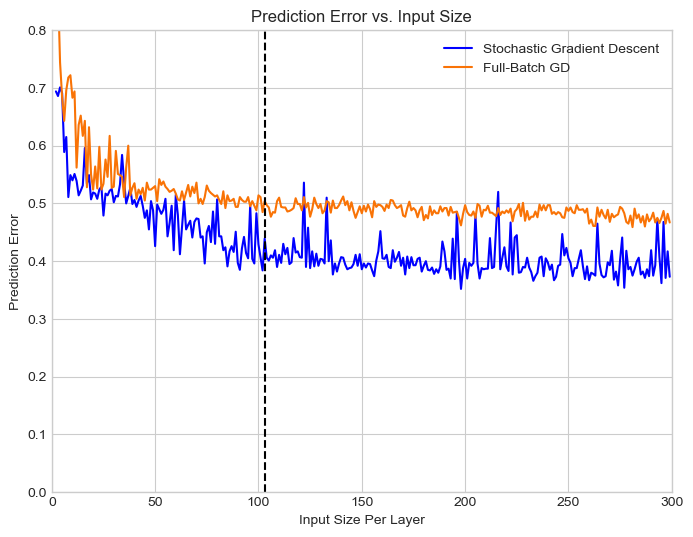

In [347]:
plt.figure(figsize=(8,6))
plt.style.use('seaborn-v0_8-whitegrid')
plt.plot([k for k in range(2,300)],test_accs_SGD,'b',label='Stochastic Gradient Descent')
plt.plot([k for k in range(2,300)],test_accs_GD,color='#F97306',label='Full-Batch GD')
plt.axvline(x=103,linestyle='--',color='black')
plt.xlim(0,300)
plt.ylim(0,.8)
plt.xlabel('Input Size Per Layer')
plt.ylabel('Prediction Error')
plt.title('Prediction Error vs. Input Size')
plt.legend()
plt.savefig("SGDvsGDDescent.png")

Now let us take a look at early stopping. We are going to revisit the data that we generated from chapter 1, plotted here 

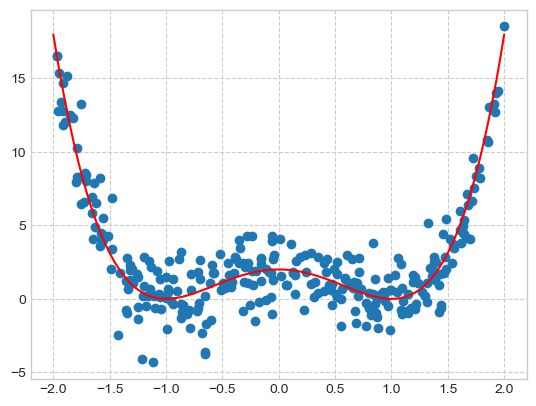

In [448]:
## Initialize the parameters
a = 2
x0 = 1
x = np.random.uniform(-2,2,300)
epsilon = np.random.normal(0,1.5,300)
y = a*(x**2-x0**2)**2 + epsilon
x_lin = np.linspace(-2,2,300)
y_quart = a*(x_lin**2-x0**2)**2

## Now plot 
fig,ax = plt.subplots()
ax.scatter(x,y)
ax.plot(x_lin,y_quart,color='red')
ax.grid(linestyle='--')

In [450]:
## We need to transform the data so that it is compatible with pytorch data structure

x_tensor = torch.from_numpy(x).float()
y_tensor = torch.from_numpy(y).float()

# Reshape tensors to be [batch_size, num_features]
# The model's linear layers expect a 2D tensor.
# We have 300 samples, each with 1 feature.
x_tensor = x_tensor.view(300, 1)
y_tensor = y_tensor.view(300, 1)

In [504]:
def EarlyStopPreds(steps):
    
    # Start the model
    model = GenNet(input_size=1, ## only 1 input this time; it's just the x value
                   hidden_size=200, ## we're gonna just a hidden layer size that is large so that we overfit
                   output_size=1, ## 1 output; it's just y
                   num_hidden_layers=2,         
                   activation_fn=nn.ReLU) 
    
    # Define the Loss Function (Mean Squared Error for least squares)
    criterion = nn.MSELoss()
    
    # Define the Optimizer (ADAM)
    # We pass the model's parameters and a learning rate lr
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    steps = steps ## This is the hyper parameter we will tune to the model 
    
    ## Start the loop
    for step in range(int(steps)):
        # Set the model to training mode
        model.train()
    
        # Forward pass: compute predicted y by passing x to the model
        y_pred = model(x_tensor)
        loss = criterion(y_pred, y_tensor) ## Compute loss
    
        #Zero gradients, perform a backward pass, and update the weights.
        optimizer.zero_grad() # Clear existing gradients
        loss.backward()       # Calculate new gradients
        optimizer.step()      # Update weights
    
    # Set the model to evaluation mode
    model.eval()
    
    # Get predictions from the trained model
    with torch.no_grad(): # No need to calculate gradients for this part
        predicted = model(x_tensor).detach().numpy()
        
    return predicted
    
def EarlyStopPlots(predicted,k):
    # Plot the results
    # Sort values for a clean line plot
    sort_indices = np.argsort(x)
    plt.scatter(x[sort_indices], y[sort_indices], s=15, label='Actual Data')
    plt.plot(x[sort_indices], predicted[sort_indices], '--o', color='red', lw=3, label='Model Prediction')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Actual vs. Predicted For Step Size k = '+k)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.savefig("EarlyStopk="+k+".png")
    plt.show()

In [458]:
## Let's preplot everything. You don't technically need to do this but it will make the slider look nicer
StepPlots = {}
StepPlots[str(1)] = EarlyStopPreds(1)
for k in range(50,2001,50):
    StepPlots[str(k)] = EarlyStopPreds(k)
    print("Plot number",k,"stored")
print("Finished!")

Plot number 50 stored
Plot number 100 stored
Plot number 150 stored
Plot number 200 stored
Plot number 250 stored
Plot number 300 stored
Plot number 350 stored
Plot number 400 stored
Plot number 450 stored
Plot number 500 stored
Plot number 550 stored
Plot number 600 stored
Plot number 650 stored
Plot number 700 stored
Plot number 750 stored
Plot number 800 stored
Plot number 850 stored
Plot number 900 stored
Plot number 950 stored
Plot number 1000 stored
Plot number 1050 stored
Plot number 1100 stored
Plot number 1150 stored
Plot number 1200 stored
Plot number 1250 stored
Plot number 1300 stored
Plot number 1350 stored
Plot number 1400 stored
Plot number 1450 stored
Plot number 1500 stored
Plot number 1550 stored
Plot number 1600 stored
Plot number 1650 stored
Plot number 1700 stored
Plot number 1750 stored
Plot number 1800 stored
Plot number 1850 stored
Plot number 1900 stored
Plot number 1950 stored
Plot number 2000 stored
Finished!


In [506]:
import ipywidgets as widgets
from ipywidgets import interact

# Make the interactive slider
labels = [1]+[k for k in range(50,2001,50)]
@interact(k=widgets.SelectionSlider(options = labels, value=1, description='Step size k'))
def update_plot(k):
    plt.figure(figsize=(8,5))
    predicted = StepPlots[str(k)]
    EarlyStopPlots(predicted,str(k))
    plt.show()


interactive(children=(SelectionSlider(description='Step size k', options=(1, 50, 100, 150, 200, 250, 300, 350,…

Lastly, we look at drop out methods, which typically involves clamping some of the nodes to 0 at every iteration of gradient descent. To see this used in practice, we will revisit the above model. The cool thing is that pytorch has a dropout method that we can implement 

In [558]:
class DropNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_hidden_layers, pval, activation_fn=nn.ReLU): ## Change activation if needed
        """
        Initializes a dynamic neural network.

        Args:
            input_size (int): The number of input features.
            hidden_size (int): The number of neurons in each hidden layer.
            output_size (int): The number of output neurons.
            num_hidden_layers (int): The number of hidden layers to create.
            activation_fn (nn.Module): The activation function class to use (e.g., nn.ReLU, nn.LeakyReLU).
        """
        super(DropNet, self).__init__()

        # Create a list to hold all the layers
        layers = []

        # Add the input layer
        # This layer maps from the input size to the first hidden size
        layers.append(nn.Linear(input_size, hidden_size))
        layers.append(activation_fn())
        layers.append(nn.Dropout(p=pval))

        # Add the hidden layers in a loop
        for _ in range(num_hidden_layers):
            layers.append(nn.Linear(hidden_size, hidden_size))
            layers.append(activation_fn()) ## arbitrary activation function but we will be using ReLU
            layers.append(nn.Dropout(p=pval))

        # Add the output layer
        # This layer maps from the last hidden size to the output size
        layers.append(nn.Linear(hidden_size, output_size))

        # Create the sequential model
        # The '*' unpacks the list of layers into arguments for nn.Sequential
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        """
        The forward pass is now handled entirely by the nn.Sequential container.
        """
        return self.network(x) ## The self.network was defined in the previous function. Sequential has already taken care of it for us

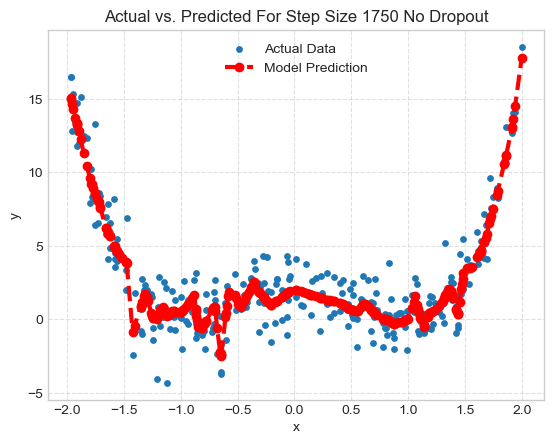

In [584]:
# Start the model
p = 0
model = DropNet(input_size=1, ## only 1 input this time; it's just the x value
               hidden_size=200, ## we're gonna just a hidden layer size that is large so that we overfit
               output_size=1, ## 1 output; it's just y
               num_hidden_layers=2,
               pval = p, 
               activation_fn=nn.ReLU) 

# Define the Loss Function (Mean Squared Error for least squares)
criterion = nn.MSELoss()

# Define the Optimizer (ADAM)
# We pass the model's parameters and a learning rate lr
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
epochs = 1750

## Start the loop
for step in range(epochs):
    # Set the model to training mode
    model.train()

    # Forward pass: compute predicted y by passing x to the model
    y_pred = model(x_tensor)
    loss = criterion(y_pred, y_tensor) ## Compute loss

    #Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad() # Clear existing gradients
    loss.backward()       # Calculate new gradients
    optimizer.step()      # Update weights

# Set the model to evaluation mode
model.eval()

# Get predictions from the trained model
with torch.no_grad(): # No need to calculate gradients for this part
    predicted = model(x_tensor).detach().numpy()
    

sort_indices = np.argsort(x)
plt.scatter(x[sort_indices], y[sort_indices], s=15, label='Actual Data')
plt.plot(x[sort_indices], predicted[sort_indices], '--o', color='red', lw=3, label='Model Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Actual vs. Predicted For Step Size 1750 No Dropout')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig("NoDropout1750"+".png")
plt.show()

## Transfer Learning